#Drill: Exploring the Central Limit Theorem

* Answer without--and then with--code.

* Increase the size of your sample from 100 to 1000, then calculate the means and standard deviations for your sample and create histograms for each. Repeat this again, decreasing the size of your sample to 20. What values change, and what remain the same?

Increasing the sample size from 100 to 1000 will almost certainly increase the specificity of the mean and decrease the value/size of the standard deviation, whereas decreasing the sample size from 100 to 20 will give a less certain mean and will probably increase the value/size of the standard deviation.

* Change the population value p for group 1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the population value p for group 1 to 0.4, and do it again. What changes, and why?

There should be a significant difference between population 1 (P(success) = 0.3) and popluation 2 (P(success) = 0.5). With one hundred attempts with 10 trials each, we should expect there to be a large enough t-value to demonstrate a significant difference between population 1 and population 2, assuming alpha = 0.05. 

Increasing the population value for population 1 to 0.4 should still show reveal significant difference between the populations (p < 0.05) thanks to the law of large numbers; however, the t-value will probably be a lot smaller and the p-value will be larger but still probably way smaller than 0.05

* Change the distribution of your population from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

I'm not entirely sure what this is asking, but if we keep the same arguments in the np.random.binomial() call function but replace it with np.random.normal(), numpy will process the data differently. The entries 10, 0.2, 100 for binomial meant means for k = 10 attempts with 0.2 likelihood of success per attempt, run the test 100 times. Whereas 10, 0.2, 100 for a normal distribution will read the mean as 10, standard deviation as 0.2, and come up with 100 data points based on those statistics.

I would answer 'no' then, as the mean values entered are likely estimates of the population values, assuming the distribution of the data will be normal. But I might be misunderstanding the question.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

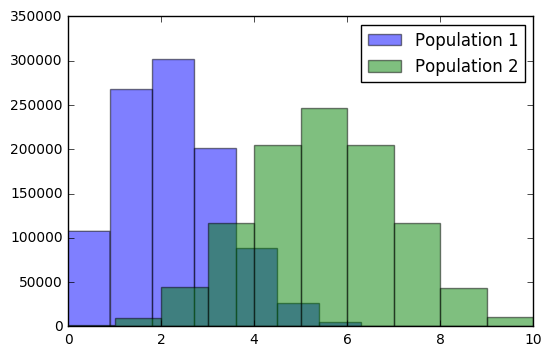

2.000537 1.26454446803
5.000062 1.58119638127


In [16]:
# pop4 = np.random.binomial(10, 0.2, 100)
# pop3 = np.random.binomial(10,0.5, 100) 

pop1 = np.random.binomial(10, 0.2, 1000000)
pop2 = np.random.binomial(10,0.5, 1000000) 

# Histograms for the two groups.

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())


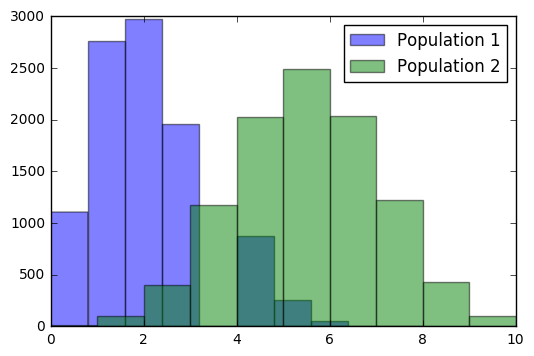

1.9745 1.26532594615
5.015 1.57085167982


In [10]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Histograms for the two groups, increasing sample size to 1000.

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())


The means should be much closer to 2.0 and 5.0, but the standard deviations actually increased in size slightly.

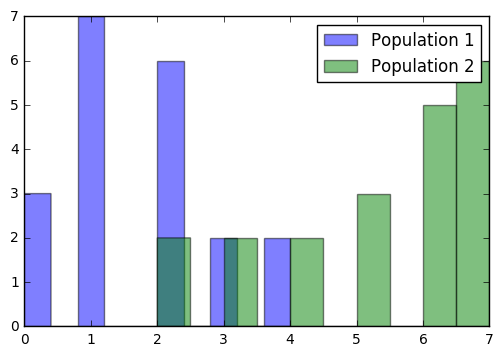

1.65 1.15217186218
5.25 1.66958078571


In [4]:
pop1 = np.random.binomial(10, 0.2, 20)
pop2 = np.random.binomial(10,0.5, 20) 

# Histograms for the two groups, decreasing number of trials to 20. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())


The means are more varied but are still close to 2.0 and 5.0. The standard deviations diverged: population 1's tends to be slightly smaller and population 2's tends to be slightly larger.

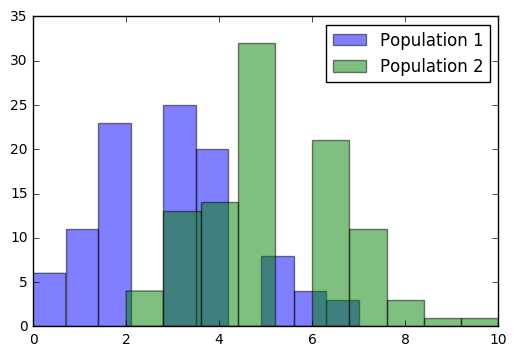

2.97 1.60284122732
5.09 1.53032676249
Ttest_indResult(statistic=9.518499494176984, pvalue=6.4000952110759658e-18)


In [5]:
pop1 = np.random.binomial(10, 0.3, 100)  #changed Probability to 0.3
pop2 = np.random.binomial(10,0.5, 100) 


plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())

from scipy.stats import ttest_ind
print(ttest_ind(pop2, pop1, equal_var=False))


The t-value is 8.2292 and the p-value is < 0.0001, suggesting a strong likelihood that the true means of population 1 and population 2 are different.

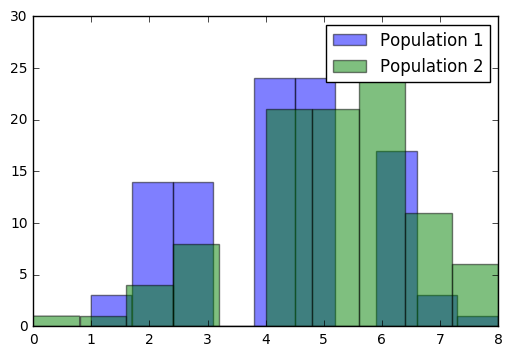

4.2 1.50996688705
5.09 1.59433371664
Ttest_indResult(statistic=4.0327240404856148, pvalue=7.8736230486797847e-05)


In [6]:
pop1 = np.random.binomial(10, 0.4, 100)  #changed Probability to 0.4
pop2 = np.random.binomial(10,0.5, 100) 


plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())

from scipy.stats import ttest_ind
print(ttest_ind(pop2, pop1, equal_var=False))


The t-value is considerably smaller than the example where P(success) = 0.3 and the p-value is considerably larger (has less significant digits) but is still < 0.0001, indicating there is still a significant difference between the true means of population 1 and population 2.

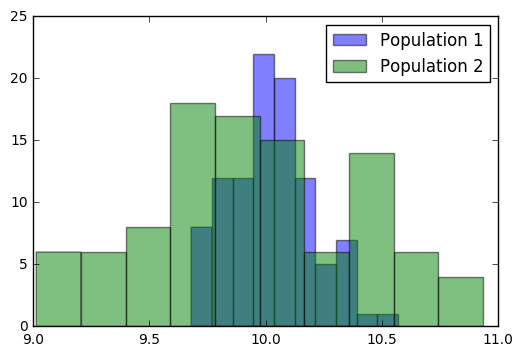

10.0256628315 0.184943064173
9.94538199346 0.457927080059


In [7]:
pop1 = np.random.normal(10, 0.2, 100) #changed from binomial to normal distributions
pop2 = np.random.normal(10, 0.5, 100) 

# Histograms for the two groups.

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()
print(pop1.mean(), pop1.std())
print(pop2.mean(), pop2.std())


Both means are approximately 10.0, and because of the standard deviation estimates we provided, we would expect there to be greater variability in population 2.